# **Data mining course project - Phase 1**
**Contributers:** *Kasra Korminejad - Shiva Radmanesh*

\\

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unrar e /content/drive/'My Drive'/DataMining/dataset.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/My Drive/DataMining/dataset.rar

Extracting  product.xlsx                                                  1 1 17  OK 
Extracting  tarikhche kharid.csv                                        2 2 3 3 4 48  OK 
Extracting  comment.xlsx                                                5 5 6 69  OK 
Extracting  keifiat.xlsx                                                6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 94  OK 
Extracting  orders.csv                                                  99  OK 
All OK


In [ ]:
import pandas as pd 
print('done')

done



## **Outliers Formula**:

We find the outliers of one feature by drawing the boxplot for that feature. Then we use $Q_1$ and  $Q_3$ to calculate the following equation: \\

$$ IQR = Q_3 - Q_1 $$ 

$$ outlier_1 < Q_1 - 1.5 \times IQR$$ 
$$or$$ 
$$ outlier_2 > Q_3 + 1.5 \times IQR$$

# **Orders dataset**

In [ ]:
df_orders = pd.read_csv('orders.csv')
df_orders

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0
...,...,...,...,...,...,...,...
199995,12172771,4403268,445940,2018-04-03 12:07:01.000,344037.0,تهران,2.0
199996,4425393,3745774,131645,2016-07-09 19:14:09.000,600000.0,محمدیه,1.0
199997,6671889,4845514,215045,2017-03-08 23:47:06.000,450000.0,اصفهان,1.0
199998,6315995,2541418,264021,2017-02-08 14:59:39.000,193486.0,همدان,1.0


## Amount_Gross_Order

In [ ]:
amount_gross_order_des = df_orders['Amount_Gross_Order'].describe()
amount_gross_order_des

count    2.000000e+05
mean     1.458204e+06
std      5.450972e+06
min      0.000000e+00
25%      1.212730e+05
50%      3.211010e+05
75%      1.011032e+06
max      1.530000e+09
Name: Amount_Gross_Order, dtype: float64

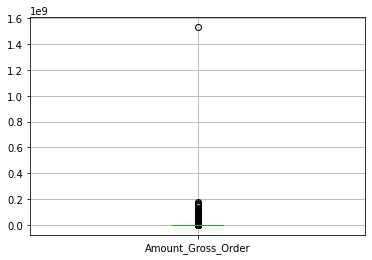

In [ ]:
boxplot1 = df_orders[['Amount_Gross_Order']].boxplot()
boxplot1

removing the outliers of these two feature

**TODO** \\
In this part, we store some atributes about our feature, such as Q1, Q2, Q3, mean, minimum and maximum.

In [ ]:
amount_gross_order_q1    =  amount_gross_order_des['25%']
amount_gross_order_q2    =  amount_gross_order_des['50%']
amount_gross_order_q3    =  amount_gross_order_des['75%']
amount_gross_order_mean  =  amount_gross_order_des['mean']
amount_gross_order_min   =  amount_gross_order_des['min']
amount_gross_order_max   =  amount_gross_order_des['max']
amount_gross_order_q1

121273.0

\\
Calulate the IQR of Amount_Gross_Order

In [ ]:
amount_gross_order_iqr = amount_gross_order_q3 - amount_gross_order_q1
print("IQR of Amount_gross_Order feature = ", amount_gross_order_iqr)

IQR of Amount_gross_Order feature =  889759.25


\\
Code below caculate the top and bottom boundries, which define the ranges that includes outliers.

* if value of a record for this feature is **less than or equal** to the ```amount_gross_outlier1``` variable, it will be considered as an outlier.
* if value of a record for this feature is **greater than or equal** to the ```amount_gross_outlier2``` variable, it will be considered as an outlier.

In [ ]:
amount_gross_outlier1 = max(amount_gross_order_q1 - 1.5 * amount_gross_order_iqr, amount_gross_order_min)
amount_gross_outlier2 = min(amount_gross_order_q3 + 1.5 * amount_gross_order_iqr, amount_gross_order_max)
print("outlier bottom boundry = " + str(amount_gross_outlier1))
print("outlier top boundry = " + str(amount_gross_outlier2))

outlier bottom boundry = 0.0
outlier top boundry = 2345671.125


\\
In this part, we can see the rows of the data in which the value for the Amount_Gross_Order feature are outlier. \\
As can be seen at the table below, there is 25563 record have outlier value for ```Amount_Gross_Order``` feature.

In [ ]:
df_orders.loc[(df_orders['Amount_Gross_Order'] < amount_gross_outlier1) | (df_orders['Amount_Gross_Order'] > amount_gross_outlier2)]

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
7,11588978,5574955,715680,2018-03-04 19:19:02.000,2790000.0,رشت,1.0
9,10740652,4928230,658519,2018-01-23 06:11:34.000,2600000.0,خرمشهر,1.0
31,6049218,2975257,145505,2017-01-12 16:57:44.000,5340000.0,زنجان,1.0
35,1566382,702672,36610,2014-12-09 08:29:35.000,7838889.0,تهران,1.0
39,3701661,1482434,114137,2016-03-27 08:23:50.000,5954128.0,مبارکه,1.0
...,...,...,...,...,...,...,...
199963,23758528,3050804,1790541,2018-11-02 17:40:31.000,2350000.0,ابرکوه,1.0
199968,9177264,3348764,398310,2017-10-26 19:43:27.000,2770000.0,تهران,1.0
199978,9175447,491508,466714,2017-10-26 13:48:47.000,6601284.0,اصفهان,1.0
199985,6194722,483447,7108,2017-01-27 21:55:48.000,3623853.0,همدان,1.0


In [ ]:
x = df_orders.loc[(df_orders['Amount_Gross_Order'] >= amount_gross_outlier1) & (df_orders['Amount_Gross_Order'] <= amount_gross_outlier2)]

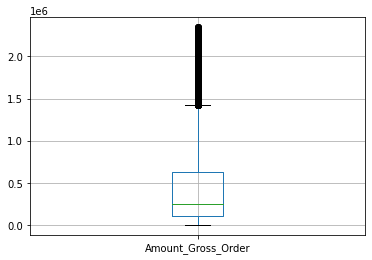

In [ ]:
x[['Amount_Gross_Order']].boxplot()

\\

## Quantity_item

In [ ]:
quantity_item_des = df_orders['Quantity_item'].describe()
quantity_item_des

count    200000.000000
mean          1.261225
std           1.801186
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         500.000000
Name: Quantity_item, dtype: float64

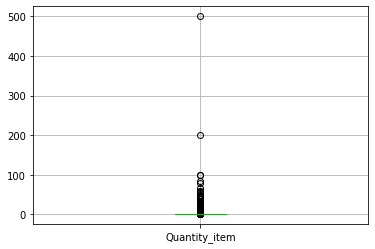

In [ ]:
df_orders[['Quantity_item']].boxplot()

removing the outliers of these two feature

**TODO** \\
In this part, we store some atributes about our feature, such as Q1, Q2, Q3, mean, minimum and maximum.

In [ ]:
quantity_item_q2    =   quantity_item_des['50%']
quantity_item_q1    =   quantity_item_des['25%']
quantity_item_q3    =   quantity_item_des['75%']
quantity_item_mean  =   quantity_item_des['mean']
quantity_item_min   =   quantity_item_des['min']
quantity_item_max   =   quantity_item_des['max']
quantity_item_q1

1.0

\\
Calulate the IQR of Quantity_item

In [ ]:
quantity_item_iqr = quantity_item_q3 - quantity_item_q1
print("IQR of Quantity_item feature = ", quantity_item_iqr)

IQR of Quantity_item feature =  0.0


\\
Code below caculate the top and bottom boundries, which define the ranges that includes outliers.

* if value of a record for this feature is **less than or equal** to the ```quantity_item_outlier1``` variable, it will be considered as an outlier.
* if value of a record for this feature is **greater than or equal** to the ```quantity_item_outlier2``` variable, it will be considered as an outlier.

In [ ]:
quantity_item_outlier1 = max(quantity_item_q1 - 1.5 * quantity_item_iqr, quantity_item_min)
quantity_item_outlier2 = min(quantity_item_q3 + 1.5 * quantity_item_iqr, quantity_item_max)
print("outlier bottom boundry = " + str(quantity_item_outlier1))
print("outlier top boundry = " + str(quantity_item_outlier2))

outlier bottom boundry = 1.0
outlier top boundry = 1.0


\\
In this part, we can see the rows of the data in which the value for the Amount_Gross_Order feature are outlier. \\
As can be seen at the table below, there is 24403 record have outlier value for ```Amount_Gross_Order``` feature.

In [ ]:
df_orders.loc[(df_orders['Quantity_item'] < quantity_item_outlier1) | (df_orders['Quantity_item'] > quantity_item_outlier2)]

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
16,23062506,7193109,1656648,2018-10-04 17:48:12.000,229000.0,تهران,2.0
18,23693949,3665022,1671745,2018-10-30 22:15:15.000,73211.0,کرج,3.0
20,6156363,3549803,193926,2017-01-24 03:05:35.000,41284.0,تهران,3.0
44,23634499,5196834,1157587,2018-10-28 16:07:17.000,142982.0,تهران,3.0
50,8186946,5356355,395337,2017-08-12 11:10:35.000,1950000.0,قائم شهر,2.0
...,...,...,...,...,...,...,...
199980,11350514,3708020,483145,2018-02-23 13:42:20.000,279817.0,تهران,4.0
199986,22105540,4343929,738895,2018-08-30 09:42:40.000,192156.0,تهران,2.0
199989,8320537,659553,192749,2017-08-24 11:38:29.000,37798.0,تهران,24.0
199992,7717838,4625961,313451,2017-07-01 01:49:29.000,504587.0,اراک,5.0


In [ ]:
x = df_orders.loc[(df_orders['Quantity_item'] >= quantity_item_outlier1) & (df_orders['Quantity_item'] <= quantity_item_outlier2)]

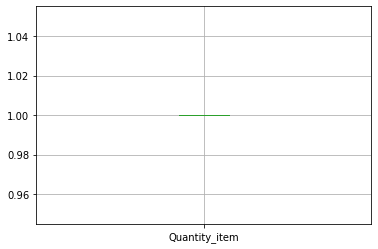

In [ ]:
x[['Quantity_item']].boxplot()

\\
#**comment dataset** 
This dataset has no numeric feature.

In [ ]:
df_comments = pd.read_excel('comment.xlsx')
df_comments

,product_id,confirmed_at,comment
0,90213,2018-08-23 11:05:47,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...
1,56871,2018-08-23 10:21:53,بوی تند ولی خوشبو داره.ماندگاریش خوبه و هر چقد...
2,49738,2018-10-13 11:13:39,متاسفانه عمر مفید این ماشین کم هست و بعد از دو...
3,134367,2018-10-17 11:27:57,افا از وقتی من اینو واسه پسرم خریدم همه بچه ها...
4,151402,2018-08-23 10:28:47,این تیغ محصول کشور آمریکا هست ( در عکس محصول م...
...,...,...,...
100003,104998,2018-07-09 21:27:12,قیمت مناسبی داره در حال حاضر . با این پول سخت ...
100004,333389,2018-07-09 21:26:52,در کل راضیم درسته لنوو با قیمت پایین تر هسته و...
100005,356546,2018-07-09 21:26:30,من این محصول رو از بیرون تهیه کردم . و باید بگ...
100006,33874,2018-07-09 21:26:12,دوسال و.نیم پیش از دیجی کالا گرفتم. هنوز مثل ر...


\\
#**keifiat dataset**

In [ ]:
df_keifiat = pd.read_excel('keifiat.xlsx')
df_keifiat

,product_id,product_title,title_en,user_id,likes,dislikes,verification_status,recommend,title,comment,advantages,disadvantages
0,3692,ماوس بی‌سیم لاجیتک مدل M325,IT,989472,0,0,verified,\N,NaN,واقعا عالیه. من که ازش خیلی راضیم,NaN,NaN
1,90213,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,AC,3862150,4,1,verified,recommended,واقعاً عالیه,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...,"[""عمر طولانی\r"",""افت بسیار کم میزان شارژ\r"",""ا...","[""ندارد""]"
2,59473,یدک پولیشر میکروفایبر مهسان مدل 20119,HW,626843,1,0,verified,not_recommended,خیلی سخت حوله اش در میاد,گیره های فلزی خیلی سخت تا میشوند و لذا حوله را...,NaN,NaN
3,120499,گوشی موبایل هوآوی آنر مدل 5X KIW-L21 دو سیم‌کارت,MO,786887,6,11,verified,no_idea,گوشی مقرون به صرفه,همه چیز در رابطه با ظاهر این گوشی بسیار خوب اس...,"[""صفحه نمایش پرنور و با کیفیت\r"",""کیفیت بالای ...","[""کیفیت پایین اسپیکر\r"",""حاشیه خالی زیر صفحه ن..."
4,67200,شارژر همراه شیائومی مدل Mi ظرفیت 5000 میلی آمپ...,AC,854531,19,4,verified,no_idea,ابعاد، استحکام و نگهداری شارژ مناسب,اگر ظرفیتش براتون کافیه حتما بخرید.\r\nیه شارژ...,"[""ظریف و زیبا و باریک\r"",""بدنه محکم و با دوام""]","[""ظرفیت متوسط""]"
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,549845,شید آباژور آرام مدل SH45/01,TC,4979401,0,0,verified,recommended,بسیار تمیز و زیبا,بسیار تمیز و زیبا...من که خیلی راضیم,"[""کاملا مطابق با عکس\r"",""ساخت بسیار تمیز""]","[""ندارد""]"
99996,784160,کفش مخصوص دویدن مردانه و زنانه آلبرتینی مدل دا...,FA,1066034,7,32,verified,\N,توصیه به خرید میکنم,من این کفش را برای پیاده روی اربعین خریدم از ی...,"[""سبک زیبا ارزان ""]","[""محل عبور بند کفش ها ایراد دارد""]"
99997,820985,واکس کفش ساتل مدل 20 حجم 60 میلی لیتر,FA,568208,0,0,verified,recommended,خوبه و غلیظه,واکس خوبیه..,"[""روغنیه""]","[""ندیدم""]"
99998,678073,کش رنگی مدادچوبی مدل 010 بسته 100,TC,981594,2,1,verified,no_idea,سلام,هیچ کدوم از این رنگهای که توی عکسه داخل بسته ن...,NaN,NaN


## likes

In [ ]:
likes_des = df_keifiat['likes'].describe()
likes_des

count    100000.000000
mean          3.114790
std           8.050031
min           0.000000
25%           0.000000
50%           1.000000
75%           4.000000
max         854.000000
Name: likes, dtype: float64

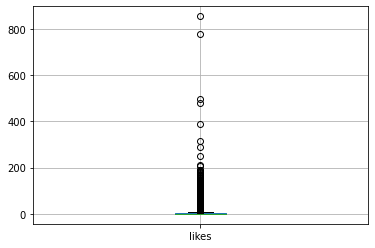

In [ ]:
df_keifiat[['likes']].boxplot()

removing the outliers of these two feature

**TODO** \\
In this part, we store some atributes about our feature, such as Q1, Q2, Q3, mean, minimum and maximum.

In [ ]:
likes_q1    =  likes_des['25%']
likes_q2    =  likes_des['50%']
likes_q3    =  likes_des['75%']
likes_mean  =  likes_des['mean']
likes_min   =  likes_des['min']
likes_max   =  likes_des['max']

\\
Calulate the IQR of likes

In [ ]:
likes_iqr = likes_q3 - likes_q1
print("IQR of likes feature = ", likes_iqr)

IQR of likes feature =  4.0


\\
Code below caculate the top and bottom boundries, which define the ranges that includes outliers.

* if value of a record for this feature is **less than or equal** to the ```likes_outlier1``` variable, it will be considered as an outlier.
* if value of a record for this feature is **greater than or equal** to the ```likes_outlier2``` variable, it will be considered as an outlier.

In [ ]:
likes_outlier1 = max(likes_q1 - 1.5 * likes_iqr, likes_min)
likes_outlier2 = min(likes_q3 + 1.5 * likes_iqr, likes_max)
print("outlier bottom boundry = " + str(likes_outlier1))
print("outlier top boundry = " + str(likes_outlier2))

outlier bottom boundry = 0.0
outlier top boundry = 10.0


\\
In this part, we can see the rows of the data in which the value for the likes feature are outlier. \\
As can be seen at the table below, there is 33112 record have outlier value for ```likes``` feature.

In [ ]:
df_keifiat.loc[(df_keifiat['likes'] <= amount_gross_outlier1) | (df_keifiat['likes'] >= amount_gross_outlier2)]

,product_id,product_title,title_en,user_id,likes,dislikes,verification_status,recommend,title,comment,advantages,disadvantages
0,3692,ماوس بی‌سیم لاجیتک مدل M325,IT,989472,0,0,verified,\N,NaN,واقعا عالیه. من که ازش خیلی راضیم,NaN,NaN
66,39527,کابل تبدیل USB به microUSB فنمکس طول 0.02 متر,AC,586409,0,0,verified,not_recommended,راضی نیستم,خریدمش ولی یکبار هم ازش استفاده نکردم.. خراب ب...,NaN,NaN
103,164654,ترازو دیجیتال رزمکس مدل WB101,PA,2775344,0,0,verified,no_idea,ترازوی خوبیه,سلام من قبلا در مورد این ترازو نظر دادم. یه ای...,NaN,NaN
125,78642,خط چشم ماژیکی ضد آب اسنس مدل 02,PC,2724686,0,0,verified,\N,ناراضی,مثل خیلی از خط چشم های ماژیکی مدادی دیگه اینم ...,NaN,NaN
186,168431,اسپیکر قابل حمل استروم مدل ST200,IT,3195590,0,5,verified,no_idea,یک سال کارکرد,من یکسال دادمش حرف نداره,"[""صدای خوب \r"",""باتری عالی \r"",""""]","[""هیچی""]"
...,...,...,...,...,...,...,...,...,...,...,...,...
99991,818381,بالش بادی پورگونر مدل KMG,TS,8027276,0,0,verified,not_recommended,ارزش خرید نداره,اندازه بالش بسیار کوچک هست بیشتر بدرد بچه ۲ سا...,NaN,NaN
99994,400647,کفش راحتی مردانه نایکی مدل Nightgazer Lw,FA,981594,0,0,verified,no_idea,سلام,کیفیت ساختش بد نیست ولی نسبت به قیمتش و برند ن...,NaN,NaN
99995,549845,شید آباژور آرام مدل SH45/01,TC,4979401,0,0,verified,recommended,بسیار تمیز و زیبا,بسیار تمیز و زیبا...من که خیلی راضیم,"[""کاملا مطابق با عکس\r"",""ساخت بسیار تمیز""]","[""ندارد""]"
99997,820985,واکس کفش ساتل مدل 20 حجم 60 میلی لیتر,FA,568208,0,0,verified,recommended,خوبه و غلیظه,واکس خوبیه..,"[""روغنیه""]","[""ندیدم""]"


In [ ]:
x = df_keifiat.loc[(df_keifiat['likes'] >= amount_gross_outlier1) & (df_keifiat['likes'] <= amount_gross_outlier2)]

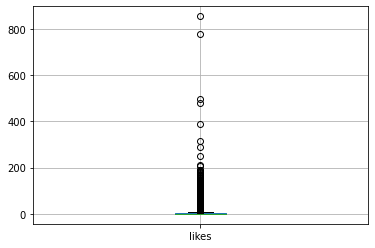

In [ ]:
x[['likes']].boxplot()

## dislikes

In [ ]:
dislikes_des = df_keifiat['dislikes'].describe()
dislikes_des

count    100000.000000
mean          1.649460
std           8.912705
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        1344.000000
Name: dislikes, dtype: float64

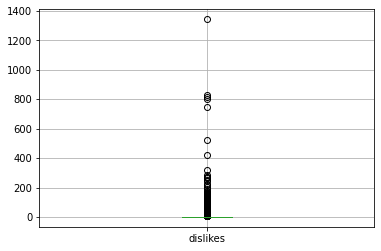

In [ ]:
df_keifiat[['dislikes']].boxplot()

removing the outliers of these two feature

**TODO** \\
In this part, we store some atributes about our feature, such as Q1, Q2, Q3, mean, minimum and maximum.

In [ ]:
dislikes_q1    =  dislikes_des['25%']
dislikes_q2    =  dislikes_des['50%']
dislikes_q3    =  dislikes_des['75%']
dislikes_mean  =  dislikes_des['mean']
dislikes_min   =  dislikes_des['min']
dislikes_max   =  dislikes_des['max']

\\
Calulate the IQR of likes

In [ ]:
dislikes_iqr = dislikes_q3 - likes_q1
print("IQR of dislikes feature = ", dislikes_iqr)

IQR of dislikes feature =  1.0


\\
Code below caculate the top and bottom boundries, which define the ranges that includes outliers.

* if value of a record for this feature is **less than or equal** to the ```dislikes_outlier1``` variable, it will be considered as an outlier.
* if value of a record for this feature is **greater than or equal** to the ```dislikes_outlier2``` variable, it will be considered as an outlier.

In [ ]:
dislikes_outlier1 = max(dislikes_q1 - 1.5 * dislikes_iqr, dislikes_min)
dislikes_outlier2 = min(dislikes_q3 + 1.5 * dislikes_iqr, dislikes_max)
print("outlier bottom boundry = " + str(dislikes_outlier1))
print("outlier top boundry = " + str(dislikes_outlier2))

outlier bottom boundry = 0.0
outlier top boundry = 2.5


\\
In this part, we can see the rows of the data in which the value for the likes feature are outlier. \\
As can be seen at the table below, there is 57438 record have outlier value for ```dislikes``` feature.

In [ ]:
df_keifiat.loc[(df_keifiat['dislikes'] <= amount_gross_outlier1) | (df_keifiat['dislikes'] >= amount_gross_outlier2)]

,product_id,product_title,title_en,user_id,likes,dislikes,verification_status,recommend,title,comment,advantages,disadvantages
0,3692,ماوس بی‌سیم لاجیتک مدل M325,IT,989472,0,0,verified,\N,NaN,واقعا عالیه. من که ازش خیلی راضیم,NaN,NaN
2,59473,یدک پولیشر میکروفایبر مهسان مدل 20119,HW,626843,1,0,verified,not_recommended,خیلی سخت حوله اش در میاد,گیره های فلزی خیلی سخت تا میشوند و لذا حوله را...,NaN,NaN
6,148509,اسپیکر بلوتوثی دیووم مدل Bluetune bean,IT,574130,3,0,verified,recommended,بسیار خوب,من چند سالی هست که این اسپیکرو خریدم و واقعا ح...,"[""کیفیت ساخت بسیار خوب\r"",""کیفیت صدا بسیار عال...","[""ندارد""]"
9,161548,فلاسک هنری مدل Virginia Special ظرفیت 1.9 لیتر,HW,3934937,1,0,verified,no_idea,خوب بودممنون,خوب بودممنون,NaN,NaN
10,5107,هارددیسک اکسترنال سیگیت مدل Backup Plus Deskto...,IT,794316,1,0,verified,recommended,هارد با کیفیت و ظاهر شیک,نزدیک به دو ساله که این هارد رو خریدم. استفاده...,"[""کیفیت ساخت خوب\r"",""ظاهر ساده و زیبا\r"",""صدای...","[""عدم مقاومت در برابر ضربه\r"",""عدم سهولت جا به..."
...,...,...,...,...,...,...,...,...,...,...,...,...
99992,907445,بست کمربندی دبلیو اند ای سایز 100x2.5 بسته 100...,TC,2754703,1,0,verified,\N,با کیفیت,استفاده کردیم خوب بود خیلی وقت بود دنبالش میگش...,NaN,NaN
99994,400647,کفش راحتی مردانه نایکی مدل Nightgazer Lw,FA,981594,0,0,verified,no_idea,سلام,کیفیت ساختش بد نیست ولی نسبت به قیمتش و برند ن...,NaN,NaN
99995,549845,شید آباژور آرام مدل SH45/01,TC,4979401,0,0,verified,recommended,بسیار تمیز و زیبا,بسیار تمیز و زیبا...من که خیلی راضیم,"[""کاملا مطابق با عکس\r"",""ساخت بسیار تمیز""]","[""ندارد""]"
99997,820985,واکس کفش ساتل مدل 20 حجم 60 میلی لیتر,FA,568208,0,0,verified,recommended,خوبه و غلیظه,واکس خوبیه..,"[""روغنیه""]","[""ندیدم""]"


In [ ]:
x = df_keifiat.loc[(df_keifiat['dislikes'] >= amount_gross_outlier1) & (df_keifiat['dislikes'] <= amount_gross_outlier2)]

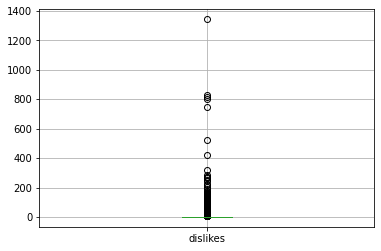

In [ ]:
x[['dislikes']].boxplot()

\\
#**product dataset**
This dataset has no numeric feature.

In [ ]:
df_product = pd.read_excel('product.xlsx')
df_product

,id,product_title_fa,product_title_en,url_code,title_alt,category_title_fa,category_keywords,brand_name_fa,brand_name_en,product_attributes
0,723302,ماگ حرارتی لومانا مدل عرفانه کد MAG1042,NaN,ماگ-حرارتی-لومانا-مدل-عرفانه-کد-mag1042,mug، لیوان ، ماگ ، فنجان ، لیوان دسته دار ، لو...,ماگ، لیوان و فنجان,ماگ، لیوان و فنجان CupandMug,لومانا,Lomana,"[{""Key"":""وزن بسته‌بندی"",""Value"":""480""},{""Key"":..."
1,727089,ست آبکش و آبگیر تیتیز مدل AP-9141 سایز متوسط,NaN,ست-آبکش-و-آبگیر-تیتیز-مدل-ap-9141-سایز-متوسط,";hsi, steel, کاسه، کاسه بامبو، لگن، کالا خانه ...",آبکش و آبگیر,آبکش و آبگیر VirgoBasin,تیتیز,Titiz,"[{""Key"":""دستگیره"",""Value"":""1 جفت""},{""Key"":""نوع..."
2,727096,روغن مرطوب کننده کدلی مدل Divine oil حجم 50 می...,NaN,روغن-مرطوب-کننده-کدلی-مدل-divine-oil-حجم-50-می...,NaN,روغن صورت,روغن صورت Face-Oil,کدلی,CAUDALIE,"[{""Key"":""حجم"",""Value"":""50""},{""Key"":""نوع عصاره""..."
3,727803,ست لحاف پوپلین هوبی مدل اما یکنفره چهار تکه کاوری,Hobby Emma Quilt Single Set - 4 Pieces,ست-لحاف-پوپلین-هوبی-مدل-اما-یکنفره-چهار-تکه-کاوری,روتختی اسپرت، اما، emma، روتختی یکنفره، لحاف ی...,سرویس خواب,سرویس خواب SleepSet,هوبی,Hobby,"[{""Key"":""ابعاد رو بالشی"",""Value"":""50×70""},{""Ke..."
4,725222,ماگ آبنبات رنگی مدل AR0143,NaN,ماگ-آبنبات-رنگی-مدل-ar0143,ماگ آبنبات رنگی،شذدشذشفقشدله،Mag Abnabatrangi,ماگ، لیوان و فنجان,ماگ، لیوان و فنجان CupandMug,متفرقه,Miscellaneous,"[{""Key"":""در"",""Value"":""ندارد""},{""Key"":""جنس"",""Va..."
...,...,...,...,...,...,...,...,...,...,...
99995,803375,سوتین زنانه طرح گل کد 262014527,NaN,سوتین-زنانه-طرح-گل-کد-262014527,لباس زیر، کتان، سوتین، شورت و سوتین، توری، جک ...,سوتین,سوتین Women-UW-Bra,متفرقه,Miscellaneous,NaN
99996,790932,محافظ صفحه نمایش مدل نانو گلس مناسب برای گوشی ...,NaN,محافظ-صفحه-نمایش-مدل-نانو-گلس-مناسب-برای-گوشی-...,نانو گلس سامسونگ J7 Pro ، محافظ صفحه نمایش ،ن...,محافظ صفحه نمایش گوشی,محافظ صفحه نمایش گوشی Cell-Phone-Screen-Guard,متفرقه,Miscellaneous,NaN
99997,786604,تابلو نوشته تکس پیک مدل A63,NaN,تابلو-نوشته-تکس-پیک-مدل-a63,"عکس نوشته,تابلونوشته,تکستگرافی,تابلوعکس,تابلو ...",تابلو شاسی,تابلو شاسی Chassis,متفرقه,Miscellaneous,NaN
99998,799047,سینی برایتون مدل BT-8387,NaN,سینی-برایتون-مدل-bt-8387,سینی، سینی چای، sdkd ]hd,سینی,سینی Tray,برایتون,briton,NaN


\\
#**tarikhche kharid dataset**

In [ ]:
df_tarikhche = pd.read_csv('tarikhche kharid.csv')
df_tarikhche

,id,product_variant_id,selling_price,rrp_price,base_price,buy_price,order_limit,start_at,end_at,tags,show_in_price_history,active,created_at,product_id,marketplace_seller_id
0,18752043,1977385,850000,850000,\N,\N,1,\N,\N,\N,1,1,2018-11-26 18:59:52,667969,2962
1,18752022,1977380,12550000,12550000,\N,\N,2,\N,\N,\N,1,0,2018-11-26 18:59:31,150144,78525
2,18752046,1977380,12500000,12500000,\N,\N,2,\N,\N,\N,1,1,2018-11-26 18:59:55,150144,78525
3,18751982,1977374,310000,310000,\N,\N,2,\N,\N,\N,1,0,2018-11-26 18:58:48,908541,4199
4,18752018,1977374,300000,300000,\N,\N,2,\N,\N,\N,1,1,2018-11-26 18:59:28,908541,4199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2184353,12763117,1155042,439000,529000,\N,\N,2,\N,\N,\N,1,0,2018-09-13 20:23:28,221109,7664
2184354,13703581,1155042,469000,529000,\N,\N,2,\N,\N,\N,1,0,2018-09-29 20:14:36,221109,7664
2184355,13703591,1155042,465000,529000,\N,\N,2,\N,\N,\N,1,0,2018-09-29 20:14:50,221109,7664
2184356,13703595,1155042,460000,460000,\N,\N,2,\N,\N,\N,1,0,2018-09-29 20:15:03,221109,7664


## selling_price

In [ ]:
selling_price_des = df_tarikhche['selling_price'].describe()
selling_price_des

count    2.184358e+06
mean     5.835065e+10
std      8.459160e+13
min      1.000000e+00
25%      7.200000e+05
50%      3.436000e+06
75%      7.699900e+06
max      1.250001e+17
Name: selling_price, dtype: float64

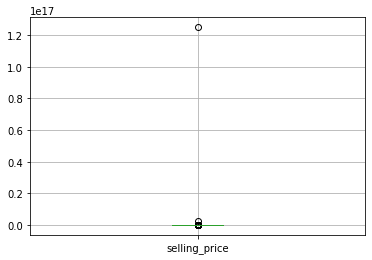

In [ ]:
df_tarikhche[['selling_price']].boxplot()

removing the outliers of these two feature

**TODO** \\
In this part, we store some atributes about our feature, such as Q1, Q2, Q3, mean, minimum and maximum.

In [ ]:
selling_price_q1    =  selling_price_des['25%']
selling_price_q2    =  selling_price_des['50%']
selling_price_q3    =  selling_price_des['75%']
selling_price_mean  =  selling_price_des['mean']
selling_price_min   =  selling_price_des['min']
selling_price_max   =  selling_price_des['max']

\\
Calulate the IQR of likes

In [ ]:
selling_price_iqr = selling_price_q3 - selling_price_q1
print("IQR of selling_price feature = ", selling_price_iqr)

IQR of selling_price feature =  6979900.0


\\
Code below caculate the top and bottom boundries, which define the ranges that includes outliers.

* if value of a record for this feature is **less than or equal** to the ```selling_price_outlier1``` variable, it will be considered as an outlier.
* if value of a record for this feature is **greater than or equal** to the ```selling_price_outlier2``` variable, it will be considered as an outlier.

In [ ]:
selling_price_outlier1 = max(selling_price_q1 - 1.5 * selling_price_iqr, selling_price_min)
selling_price_outlier2 = min(selling_price_q3 + 1.5 * selling_price_iqr, selling_price_max)
print("outlier bottom boundry = " + str(selling_price_outlier1))
print("outlier top boundry = " + str(selling_price_outlier2))

outlier bottom boundry = 1.0
outlier top boundry = 18169750.0


\\
In this part, we can see the rows of the data in which the value for the likes feature are outlier. \\
As can be seen at the table below, there is 33112 record have outlier value for ```selling_price``` feature.

In [ ]:
df_tarikhche.loc[(df_tarikhche['selling_price'] <= amount_gross_outlier1) | (df_tarikhche['selling_price'] >= amount_gross_outlier2)]

,id,product_variant_id,selling_price,rrp_price,base_price,buy_price,order_limit,start_at,end_at,tags,show_in_price_history,active,created_at,product_id,marketplace_seller_id
1,18752022,1977380,12550000,12550000,\N,\N,2,\N,\N,\N,1,0,2018-11-26 18:59:31,150144,78525
2,18752046,1977380,12500000,12500000,\N,\N,2,\N,\N,\N,1,1,2018-11-26 18:59:55,150144,78525
5,18751959,1977367,15500000,15500000,\N,\N,2,\N,\N,\N,1,0,2018-11-26 18:58:19,150144,78525
6,18752064,1977367,12500000,12500000,\N,\N,2,\N,\N,\N,1,1,2018-11-26 19:00:16,150144,78525
8,18751880,1977358,15800000,15800000,\N,\N,2,\N,\N,\N,1,1,2018-11-26 18:56:59,150144,78525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2184061,15998814,1155117,7920000,7920000,\N,\N,4,\N,\N,\N,1,0,2018-10-25 10:14:07,56307,8776
2184062,16213949,1155117,7910000,7910000,\N,\N,4,\N,\N,\N,1,1,2018-10-28 12:00:11,56307,8776
2184069,14405974,1155093,2420000,2420000,\N,\N,5,\N,\N,\N,1,1,2018-10-07 17:45:43,390295,2009
2184109,7191124,1155075,2350000,2350000,2350000,\N,1,\N,\N,\N,1,0,2018-06-25 16:27:25,52236,169


In [ ]:
x = df_tarikhche.loc[(df_tarikhche['selling_price'] > amount_gross_outlier1) & (df_tarikhche['selling_price'] < amount_gross_outlier2)]

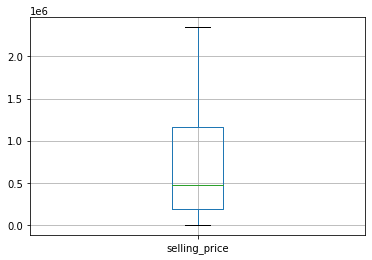

In [ ]:
x[['selling_price']].boxplot()

## rrp_price

In [ ]:
rrp_price_des = df_tarikhche['rrp_price'].describe()
rrp_price_des

count    2.184358e+06
mean     5.852594e+10
std      8.459193e+13
min      1.000000e+00
25%      7.900000e+05
50%      3.500000e+06
75%      7.795000e+06
max      1.250001e+17
Name: rrp_price, dtype: float64

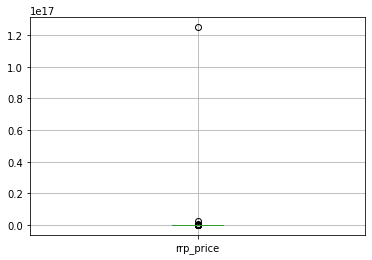

In [ ]:
df_tarikhche[['rrp_price']].boxplot()

removing the outliers of these two feature

**TODO** \\
In this part, we store some atributes about our feature, such as Q1, Q2, Q3, mean, minimum and maximum.

In [ ]:
rrp_price_q1    =  rrp_price_des['25%']
rrp_price_q2    =  rrp_price_des['50%']
rrp_price_q3    =  rrp_price_des['75%']
rrp_price_mean  =  rrp_price_des['mean']
rrp_price_min   =  rrp_price_des['min']
rrp_price_max   =  rrp_price_des['max']

\\
Calulate the IQR of likes

In [ ]:
rrp_price_iqr = rrp_price_q3 - rrp_price_q1
print("IQR of rrp_price feature = ", rrp_price_iqr)

IQR of rrp_price feature =  7005000.0


\\
Code below caculate the top and bottom boundries, which define the ranges that includes outliers.

* if value of a record for this feature is **less than or equal** to the ```rrp_price_outlier1``` variable, it will be considered as an outlier.
* if value of a record for this feature is **greater than or equal** to the ```rrp_price_outlier2``` variable, it will be considered as an outlier.

In [ ]:
rrp_price_outlier1 = max(selling_price_q1 - 1.5 * rrp_price_iqr, rrp_price_min)
rrp_price_outlier2 = min(selling_price_q3 + 1.5 * rrp_price_iqr, rrp_price_max)
print("outlier bottom boundry = " + str(rrp_price_outlier1))
print("outlier top boundry = " + str(rrp_price_outlier2))

outlier bottom boundry = 1.0
outlier top boundry = 18207400.0


\\
In this part, we can see the rows of the data in which the value for the likes feature are outlier. \\
As can be seen at the table below, there is 1312417 record have outlier value for ```rrp_price``` feature.

In [ ]:
df_tarikhche.loc[(df_tarikhche['rrp_price'] <= amount_gross_outlier1) | (df_tarikhche['rrp_price'] >= amount_gross_outlier2)]

,id,product_variant_id,selling_price,rrp_price,base_price,buy_price,order_limit,start_at,end_at,tags,show_in_price_history,active,created_at,product_id,marketplace_seller_id
1,18752022,1977380,12550000,12550000,\N,\N,2,\N,\N,\N,1,0,2018-11-26 18:59:31,150144,78525
2,18752046,1977380,12500000,12500000,\N,\N,2,\N,\N,\N,1,1,2018-11-26 18:59:55,150144,78525
5,18751959,1977367,15500000,15500000,\N,\N,2,\N,\N,\N,1,0,2018-11-26 18:58:19,150144,78525
6,18752064,1977367,12500000,12500000,\N,\N,2,\N,\N,\N,1,1,2018-11-26 19:00:16,150144,78525
8,18751880,1977358,15800000,15800000,\N,\N,2,\N,\N,\N,1,1,2018-11-26 18:56:59,150144,78525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2184062,16213949,1155117,7910000,7910000,\N,\N,4,\N,\N,\N,1,1,2018-10-28 12:00:11,56307,8776
2184069,14405974,1155093,2420000,2420000,\N,\N,5,\N,\N,\N,1,1,2018-10-07 17:45:43,390295,2009
2184070,15952720,1155093,2330000,2420000,0,\N,5,2018-11-19 10:00:00,2018-11-27 10:00:00,selling_and_sales,1,1,2018-10-24 16:26:50,390295,2009
2184109,7191124,1155075,2350000,2350000,2350000,\N,1,\N,\N,\N,1,0,2018-06-25 16:27:25,52236,169


In [ ]:
x = df_tarikhche.loc[(df_tarikhche['rrp_price'] > amount_gross_outlier1) & (df_tarikhche['rrp_price'] < amount_gross_outlier2)]

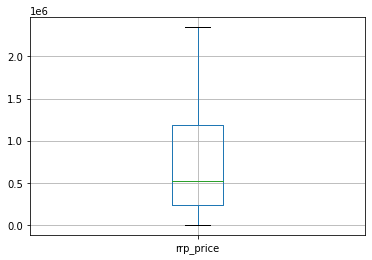

In [ ]:
x[['rrp_price']].boxplot()